# IMT 573 - Problem Set 5 - Descriptive Data Analysis

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Pratiibh Bassi

Collaborators: Sophin Liu (recorded solution lecture)

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In a previous lab, we examined data from [an article](https://fivethirtyeight.com/features/women-in-comic-books/) published on fivethirtyeight.com where the authors discuss gender representation in comic books. The data also contains a host of other information about comic book superheros and villans. For this assignment, we will use the same dataset.

The data is split across the two major comic book publishers in the US - DC and Marvel. The urls for each are below. Use these to import the data for each of the publishers into separate dataframes and then combine the two into a larger dataframe.

In [16]:
url_dc = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv"
url_marvel = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv"

In [18]:
dc_data = pd.read_csv(url_dc)
marvel_data = pd.read_csv(url_marvel)

In [28]:
dc_data['Data_source'] = 'DC'
dc_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Data_source
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC


In [32]:
marvel_data['Data_source'] = 'Marvel'

marvel_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Data_source
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Marvel
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Marvel
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Marvel
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Marvel


In [30]:
marvel_data = marvel_data.rename(columns={'Year':'YEAR'})

marvel_data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

In [22]:
data_all = pd.concat([dc_data, marvel_data])

In [24]:
data_all

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [34]:
data_all.isna().sum()

page_id                 0
name                    0
urlslug                 0
ID                   5783
ALIGN                3413
EYE                 13395
HAIR                 6538
SEX                   979
GSM                 23118
ALIVE                   6
APPEARANCES          1451
FIRST APPEARANCE      884
YEAR                  884
dtype: int64

### Problem 1: Recreate the bar graph

Use the provided data to create a visualization similar to the one titled "Good Girls Gone Meh" in the [article](https://fivethirtyeight.com/features/women-in-comic-books/) but for all the data (i.e. not split by DC and Marvel). Ensure that:

- your visualization shows the percentages for each group
- your visualization's colors and axis labels align with the original

In [36]:
data_all.ALIGN.unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [38]:
data_all.SEX.unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters',
       'Genderfluid Characters', 'Agender Characters'], dtype=object)

In [42]:
sns.set_style('dark')

red = "#ff2700"
yellow = "#f6b900"
green = "#77ab43"

In [44]:
data_filtered = data_all[data_all.SEX.isin(['Female Characters', 'Male Characters'])].copy()
data_filtered = data_filtered[data_filtered.ALIGN.isin(['Good Characters', 'Bad Characters', 'Neutral Characters'])]
data_filtered.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [46]:
data_grouped = data_filtered.groupby(['SEX', 'ALIGN'])['page_id'].count()
data_grouped

SEX                ALIGN             
Female Characters  Bad Characters        1573
                   Good Characters       2490
                   Neutral Characters     836
Male Characters    Bad Characters        7561
                   Good Characters       4809
                   Neutral Characters    1799
Name: page_id, dtype: int64

In [48]:
data_total = data_filtered.groupby(['SEX'])['page_id'].count()
data_total

SEX
Female Characters     4899
Male Characters      14169
Name: page_id, dtype: int64

In [50]:
data_grouped = (data_grouped / data_total)
data_grouped

SEX                ALIGN             
Female Characters  Bad Characters        0.321086
                   Good Characters       0.508267
                   Neutral Characters    0.170647
Male Characters    Bad Characters        0.533630
                   Good Characters       0.339403
                   Neutral Characters    0.126967
Name: page_id, dtype: float64

In [52]:
data_grouped = data_grouped.unstack()
data_grouped

ALIGN,Bad Characters,Good Characters,Neutral Characters
SEX,,,
Female Characters,0.321086,0.508267,0.170647
Male Characters,0.533630,0.339403,0.126967


In [54]:
data_grouped = data_grouped.iloc[::-1] * 100
data_grouped

ALIGN,Bad Characters,Good Characters,Neutral Characters
SEX,,,
Male Characters,53.362976,33.940292,12.696732
Female Characters,32.108594,50.826699,17.064707


In [56]:
data_grouped = data_grouped.rename(columns={'Bad Characters': 'Bad', 'Good Characters': 'Good', 'Neutral Characters': 'Neutral'})

data_grouped = data_grouped.reset_index()

In [58]:
data_grouped.head()

ALIGN,SEX,Bad,Good,Neutral
0,Male Characters,53.362976,33.940292,12.696732
1,Female Characters,32.108594,50.826699,17.064707


Text(0, 0.5, 'ratio by gender and source')

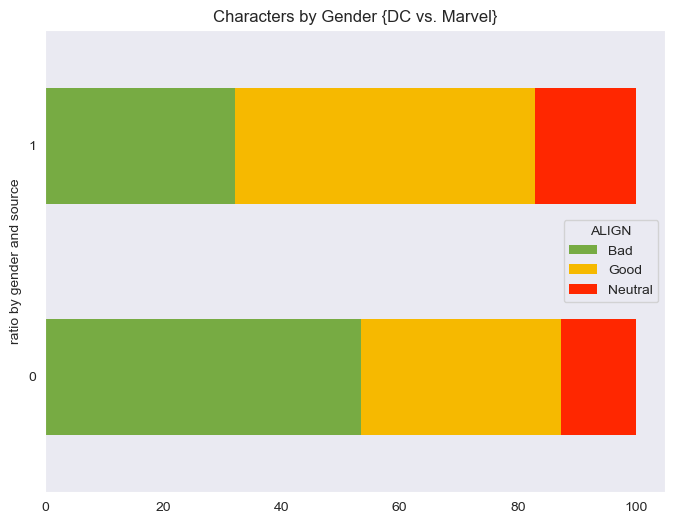

In [62]:
ax = data_grouped.plot(kind = 'barh', stacked = "True", color = [green, yellow, red], linewidth = 0, width = 0.5, figsize = (8, 6), 
                       title = 'Characters by Gender {DC vs. Marvel}')

ax.set_ylabel('ratio by gender and source')

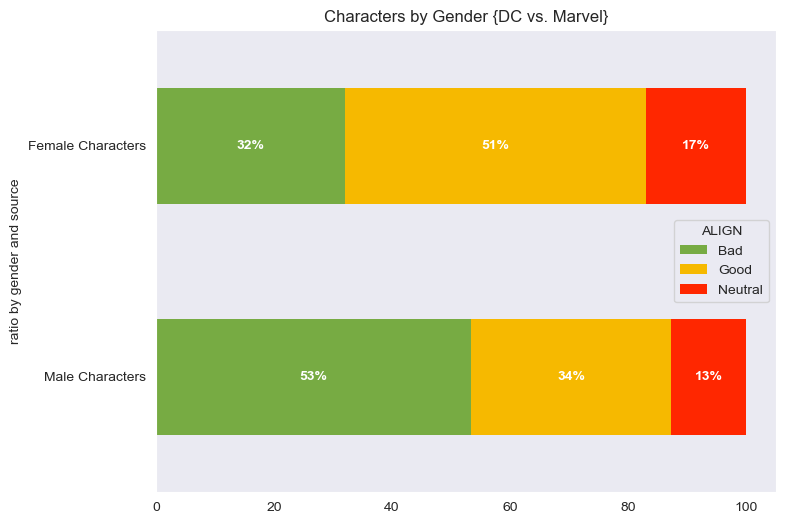

In [70]:
ax = data_grouped.plot(kind = 'barh', stacked = "True", color = [green, yellow, red], linewidth = 0, width = 0.5, figsize = (8, 6), 
                       title = 'Characters by Gender {DC vs. Marvel}')

ax.set_ylabel('ratio by gender and source')

tick_labels = data_grouped.apply(lambda row: f"{row['SEX']}", axis=1)

ax.set_yticks(range(len(tick_labels)))
ax.set_yticklabels(tick_labels)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.0f}%'.format(width), horizontalalignment='center', verticalalignment='center', color = 'white', weight = 'bold')

### Problem 2: Recreate a visualization

Use the provided data to recreate another of the visualizations in the [article](https://fivethirtyeight.com/features/women-in-comic-books/). Ensure that colors and axis labels of the re-created visualization align with the original. Be clear about which visualization you are recreating.

In [74]:
sns.set_style('darkgrid', {'grid.color': '#CCCCCC'})

In [76]:
data_all.GSM.unique()

array([nan, 'Bisexual Characters', 'Homosexual Characters',
       'Transvestites', 'Pansexual Characters', 'Transgender Characters',
       'Genderfluid Characters'], dtype=object)

In [84]:
data_filtered = data_all[~data_all.GSM.isna()].reset_index(drop = True).copy()
data_filtered.shape

(154, 13)

In [86]:
data_filtered.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1704,John Constantine (New Earth),\/wiki\/John_Constantine_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Bisexual Characters,Living Characters,371.0,"1984, June",1984.0
1,8856,Renee Montoya (New Earth),\/wiki\/Renee_Montoya_(New_Earth),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,308.0,"1992, March",1992.0
2,1862,Todd Rice (New Earth),\/wiki\/Todd_Rice_(New_Earth),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Homosexual Characters,Living Characters,208.0,"1983, September",1983.0
3,1658,Margaret Sawyer (New Earth),\/wiki\/Margaret_Sawyer_(New_Earth),Public Identity,NaN,Blue Eyes,NaN,Female Characters,Homosexual Characters,Living Characters,180.0,"1987, April",1987.0
4,1597,Hartley Rathaway (New Earth),\/wiki\/Hartley_Rathaway_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Male Characters,Homosexual Characters,Living Characters,160.0,"1959, May",1959.0


C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


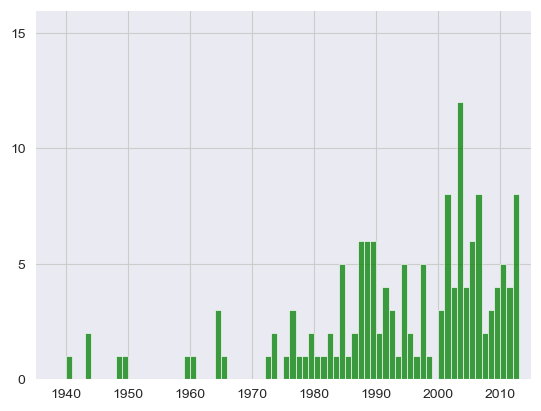

In [82]:
sns.histplot(data = data_filtered, x = 'YEAR', binwidth = 1, color = 'green').set(xlim = [1935, 2015], xlabel = '',
            ylabel = '', ylim = [0, 16], yticks = [0, 5, 10, 15]);

### Problem 3: Reflect

After producing your own visualization, comment on your ability to recreate the visual from the article exactly. Are there places where you see discrepancies? Why might this be the case? Do you need any additional information not present in the article to be able to do this

Using the help from Professor Sophin, I was able to recreate the visuals exactly as the article had them!  I found this problem set to be astonishing in terms of how much I learned!  I didn't think it would be able to look so similar to exactly they had in the article!  There are few discrepancies here and there, such as axis titles being different but the visualized data itself looks exactly the way it was presented.  Using the data we were able to do exactly what was shown in the article, and there is no additional required data to do this.